<a href="https://colab.research.google.com/github/R4HUL-ROY/Deep_Learning/blob/main/MLP_Regressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import numpy as np
import pandas as pd
import tensorflow as tf
print(tf.__version__)

2.7.0


In [58]:
!pip install keras-tuner

In [59]:
df = pd.read_csv('/content/drive/MyDrive/Machine Learning/ML DATASET/concrete_data.csv')

In [60]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [61]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [62]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [63]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import *
import keras_tuner as kt
from keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

In [64]:
def build_model(hp):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(8,)))
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(Dense(units=hp.Int('units_' + str(i),min_value=16, max_value=512,step=16) ,activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer=tf.keras.optimizers.Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])), loss='mean_absolute_error', metrics=['mean_absolute_error'])
    return model

In [65]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_mean_absolute_error',
    max_trials=5,
    executions_per_trial=3,
    directory='proj_regression',
    project_name='Air_quality_')

INFO:tensorflow:Reloading Oracle from existing project proj_regression/Air_quality_/oracle.json
INFO:tensorflow:Reloading Tuner from proj_regression/Air_quality_/tuner0.json


In [66]:
tuner.search_space_summary()

Search space summary
Default search space size: 12
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 512, 'step': 16, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 512, 'step': 16, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 512, 'step': 16, 'sampling': None}
units_3 (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 512, 'step': 16, 'sampling': None}
units_4 (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 512, 'step': 16, 'sampling': None}
units_5 (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 512, 'step': 16, 'sampling': None}
units_6 (Int)
{'default': None, 'co

In [67]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x , y, test_size=0.2, random_state = 32)

In [68]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [69]:
tuner_search = tuner.search(x_train_scaled, y_train,
             epochs=100,
             validation_data=(x_test_scaled, y_test))

INFO:tensorflow:Oracle triggered exit


In [70]:
tuner.results_summary()

Results summary
Results in proj_regression/Air_quality_
Showing 10 best trials
Objective(name='val_mean_absolute_error', direction='min')
Trial summary
Hyperparameters:
num_layers: 8
units_0: 256
units_1: 368
learning_rate: 0.001
units_2: 432
units_3: 368
units_4: 368
units_5: 256
units_6: 288
units_7: 64
units_8: 80
units_9: 320
Score: 2.876666863759359
Trial summary
Hyperparameters:
num_layers: 8
units_0: 144
units_1: 480
learning_rate: 0.001
units_2: 480
units_3: 128
units_4: 336
units_5: 144
units_6: 480
units_7: 304
units_8: 16
units_9: 416
Score: 2.8838257789611816
Trial summary
Hyperparameters:
num_layers: 5
units_0: 80
units_1: 384
learning_rate: 0.01
units_2: 272
units_3: 256
units_4: 448
units_5: 256
units_6: 448
units_7: 176
units_8: 416
units_9: 224
Score: 3.0061305363972983
Trial summary
Hyperparameters:
num_layers: 9
units_0: 112
units_1: 144
learning_rate: 0.0001
units_2: 48
units_3: 128
units_4: 128
units_5: 192
units_6: 432
units_7: 496
units_8: 384
units_9: 432
Score:

In [71]:
regressor = Sequential()

regressor.add(Dense(units = 48, kernel_initializer= 'he_uniform', activation='relu' , input_shape=(8,)))

regressor.add(Dense(units = 232, kernel_initializer= 'he_uniform', activation='relu'))

regressor.add(Dense(units = 16, kernel_initializer= 'he_uniform', activation='relu'))

regressor.add(Dense(units = 16, kernel_initializer= 'he_uniform', activation='relu'))

regressor.add(Dense(units = 1, kernel_initializer= 'glorot_uniform', activation = 'linear'))

In [72]:
regressor.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 48)                432       
                                                                 
 dense_15 (Dense)            (None, 232)               11368     
                                                                 
 dense_16 (Dense)            (None, 16)                3728      
                                                                 
 dense_17 (Dense)            (None, 16)                272       
                                                                 
 dense_18 (Dense)            (None, 1)                 17        
                                                                 
Total params: 15,817
Trainable params: 15,817
Non-trainable params: 0
_________________________________________________________________


In [73]:
regressor.compile(optimizer=Adam(learning_rate=0.01), loss='mean_absolute_error', metrics=['mean_absolute_error'] )
model_history = regressor.fit(x_train_scaled, y_train, validation_split=0.2, batch_size = 10, epochs = 100)

Epoch 1/100
66/66 [==============================] - 1s 4ms/step - loss: 14.6669 - mean_absolute_error: 14.6669 - val_loss: 12.4833 - val_mean_absolute_error: 12.4833
Epoch 2/100
66/66 [==============================] - 0s 3ms/step - loss: 10.7095 - mean_absolute_error: 10.7095 - val_loss: 10.5359 - val_mean_absolute_error: 10.5359
Epoch 3/100
66/66 [==============================] - 0s 3ms/step - loss: 8.9036 - mean_absolute_error: 8.9036 - val_loss: 8.1519 - val_mean_absolute_error: 8.1519
Epoch 4/100
66/66 [==============================] - 0s 3ms/step - loss: 7.5759 - mean_absolute_error: 7.5759 - val_loss: 7.8726 - val_mean_absolute_error: 7.8726
Epoch 5/100
66/66 [==============================] - 0s 3ms/step - loss: 6.6126 - mean_absolute_error: 6.6126 - val_loss: 8.1567 - val_mean_absolute_error: 8.1567
Epoch 6/100
66/66 [==============================] - 0s 2ms/step - loss: 6.1073 - mean_absolute_error: 6.1073 - val_loss: 6.4767 - val_mean_absolute_error: 6.4767
Epoch 7/100
66

In [81]:
mae_neural=regressor.evaluate(x_test_scaled,y_test)
print('Mean absolute error from neural network :', mae_neural)

7/7 [==============================] - 0s 2ms/step - loss: 3.7800 - mean_absolute_error: 3.7800
Mean absolute error from neural network : [3.780029058456421, 3.780029058456421]


In [75]:
from matplotlib import pyplot as plt

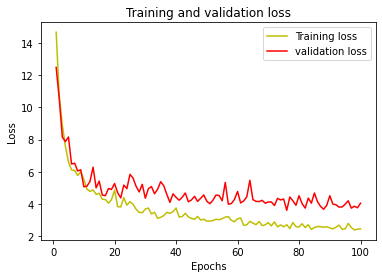

In [76]:
loss=model_history.history['loss']
val_loss=model_history.history['val_loss']
epochs=range(1,len(loss) +1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

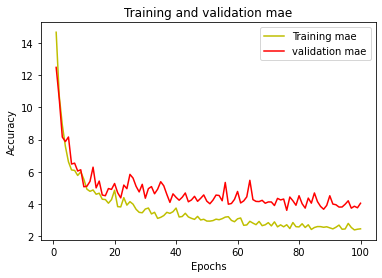

In [77]:
acc=model_history.history['mean_absolute_error']
val_acc=model_history.history['val_mean_absolute_error']
plt.plot(epochs, acc, 'y', label='Training mae')
plt.plot(epochs, val_acc, 'r', label='validation mae')
plt.title('Training and validation mae')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [78]:
predictions=regressor.predict(x_test_scaled[:5])
print("predicted value are:\n",predictions)
print("real value are:\n",y_test[:5])

predicted value are:
 [[19.402992]
 [30.060278]
 [13.075176]
 [46.6426  ]
 [39.71788 ]]
real value are:
 875    18.28
660    31.02
606    12.84
233    53.90
692    39.70
Name: Strength, dtype: float64


In [79]:
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [80]:
lr_model=linear_model.LinearRegression()
lr_model.fit(x_train_scaled,y_train)
y_pred_lr=lr_model.predict(x_test_scaled)
mse_lr=mean_squared_error(y_test,y_pred_lr)
mae_lr=mean_absolute_error(y_test, y_pred_lr)
print('Mean squared error from linear regression:', mse_lr)
print('Mean absolute error from linear regression:', mae_lr)

Mean squared error from linear regression: 95.56665006372283
Mean absolute error from linear regression: 7.616684073811422
